# MINI PROJETO - KMeans e DBSCAN - TITANIC SURVIVAL PREDICTION

### Projeto da cadeira de Sistemas Inteligentes (2023.2 - IF684EC - CIn - UFPE) que consiste em utilizar os algoritmos de KMeans e DBSCAN para agrupar os passageiros do Titanic em clusters.

### Desenvolvido por:

> Rafael do Nascimento Moura - rnm4@cin.ufpe.br

> Rodrigo Rocha Moura - rrm2@cin.ufpe.br

## Instalando depend√™ncias



In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn

## Importando as bibliotecas

In [ ]:
import numpy as np # utilizada para
import pandas as pd # utilizada para analisar a base de dados
import matplotlib.pyplot as plt # utilizada para plotar gr√°ficos
import seaborn as sns # utilizada para visualiza√ß√£o de dados
import itertools #criar combina√ß√µes para testes de par√¢metros
import plotly.express as px #plotar gr√°fico dos clusters
from sklearn.cluster import KMeans # KMeans
from sklearn.cluster import DBSCAN # DBSCAN
from sklearn.preprocessing import StandardScaler # normalizador dos dados
from sklearn.metrics import silhouette_score # m√©todo da silhueta
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.decomposition import PCA  #redu√ß√£o de dimens√µes do dataset


## Analisando a base de dados

In [ ]:
titanic_data = pd.read_csv('data/titanic_unsupervised.csv') # titanic_data cont√©m o conte√∫do de treinamento

In [ ]:
titanic_data # uma breve visualiza√ß√£o do conte√∫do de treinamento

Unnamed: 0  PassengerId  Pclass  \
0             0            1       3   
1             1            2       1   
2             2            3       3   
3             3            4       1   
4             4            5       3   
..          ...          ...     ...   
886         886          887       2   
887         887          888       1   
888         888          889       3   
889         889          890       1   
890         890          891       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

#### √â importante entender cada vari√°vel para construir rela√ß√µes que ajudar√£o a resolver o problema. Desse modo, aqui est√° a descri√ß√£o das colunas do dataframe:

> PassengerId: ID do passageiro.

> Pclass: A classe do ticket do passageiro, que pode ser primeira classe (1), segunda classe (2) e terceira classe (3).

> Name: Nome do passageiro.

> Sex: male (masculino) ou female (feminino).

> Age: Idade do passageiro. ***√â fracion√°ria se menor que 1. Se a idade for uma estimativa, ent√£o √© da forma xx.5.***

> SibSp: Quantidade de passageiros que s√£o das categorias irm√£o, irm√£, meio-irm√£o, meio-irm√£, marido, esposa.

> Parch: Quantidade de passageiros que s√£o das categorias pai, m√£e, filha, filho, enteada, enteado.

> Ticket: O c√≥digo do ticket do passageiro.

> Fare: O pre√ßo da passagem do passageiro.

> Cabin: O n√∫mero da cabine do passageiro.

> Embarked: O porto pelo qual o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
titanic_data.describe()

Unnamed: 0  PassengerId      Pclass         Age       SibSp  \
count  891.000000   891.000000  891.000000  714.000000  891.000000   
mean   445.000000   446.000000    2.308642   29.699118    0.523008   
std    257.353842   257.353842    0.836071   14.526497    1.102743   
min      0.000000     1.000000    1.000000    0.420000    0.000000   
25%    222.500000   223.500000    2.000000   20.125000    0.000000   
50%    445.000000   446.000000    3.000000   28.000000    0.000000   
75%    667.500000   668.500000    3.000000   38.000000    1.000000   
max    890.000000   891.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

**Analisando a coluna de sexo:**

In [ ]:
print(titanic_data['Sex'].value_counts(dropna = False)) # quantidade de homens e mulheres √† bordo

male      577
female    314
Name: Sex, dtype: int64


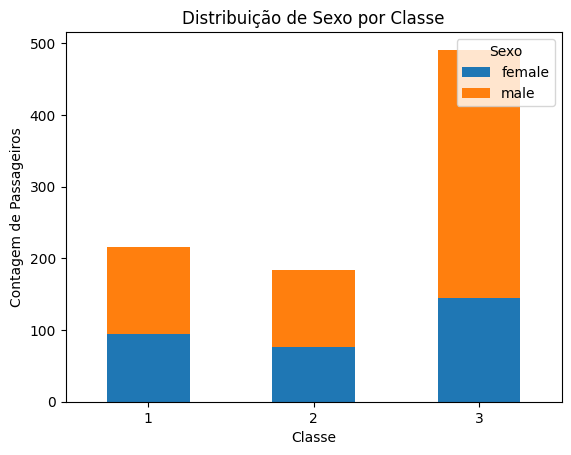

In [ ]:
sex_by_class = titanic_data.groupby(['Pclass', 'Sex']).size().unstack()

sex_by_class.plot(kind='bar', stacked=True)
plt.title('Distribui√ß√£o de Sexo por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem de Passageiros')
plt.xticks(rotation=0)
plt.legend(title='Sexo', loc='upper right')
plt.show()

**Analisando a coluna da classe do passageiro:**

In [ ]:
print(titanic_data['Pclass'].value_counts(dropna = False)) # quantidade de passageiros por classe

3    491
1    216
2    184
Name: Pclass, dtype: int64


**Analisando a coluna do porto de embarque do passageiro:**

In [ ]:
print(titanic_data['Embarked'].value_counts(dropna = False)) # quantidade de embarques por portos

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


<ipython-input-36-9439c4920a5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobreviv√™ncia por classe e por porto de embarque
<ipython-input-36-9439c4920a5c>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobreviv√™ncia por classe e por porto de embarque


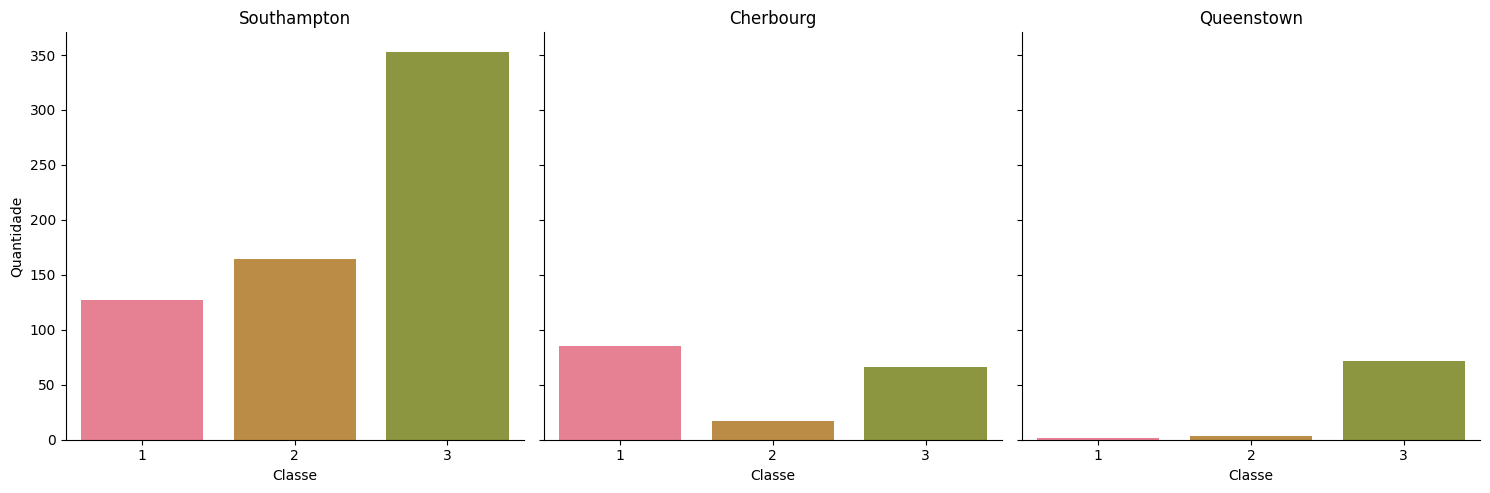

In [ ]:
g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobreviv√™ncia por classe e por porto de embarque

titulos = ['Southampton', 'Cherbourg', 'Queenstown']
for ax, titulo in zip(g.axes.flat, titulos):
    ax.set_title(titulo)
    ax.set_xlabel('Classe')
    ax.set_ylabel('Quantidade')

plt.show()

A partir da distribui√ß√£o acima, podemos concluir que a maior parte dos passageiros da terceira classe embarcaram no porto de Southampton.

**Analisando a coluna de idade:**

Text(0.5, 1.0, 'Distribui√ß√£o de Idade dos Passageiros')

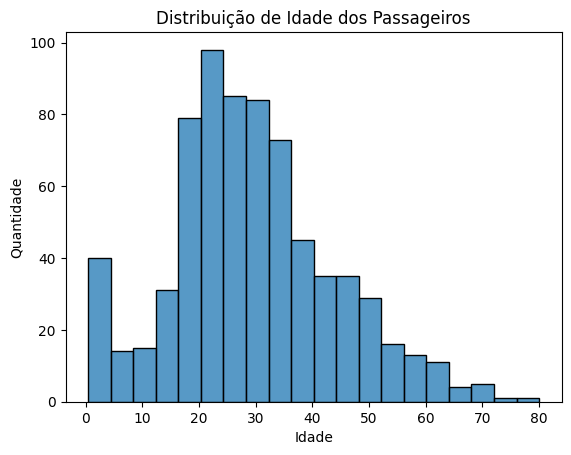

In [ ]:
sns.histplot(titanic_data['Age']) # histograma
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribui√ß√£o de Idade dos Passageiros')

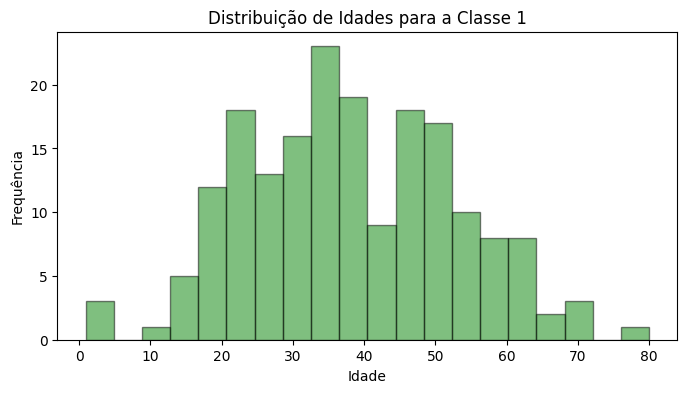

In [ ]:
# Seleciona as idades dos passageiros dessa classe
ages = titanic_data[titanic_data['Pclass'] == 1]['Age']

# Cria o histograma
plt.figure(figsize=(8, 4))
plt.hist(ages, bins=20, alpha=0.5, color='g', edgecolor='black')

plt.title('Distribui√ß√£o de Idades para a Classe 1')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')

plt.show()

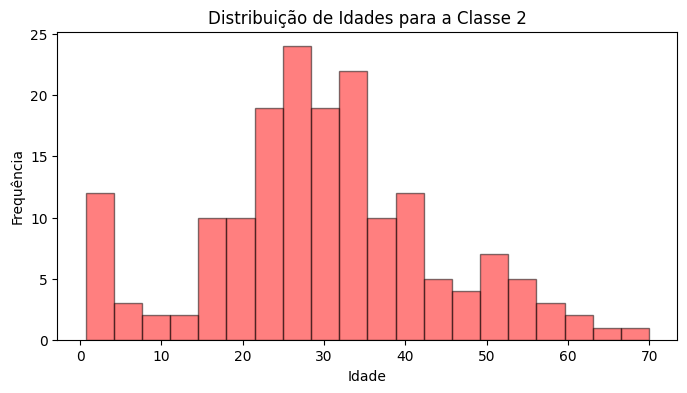

In [ ]:
# Seleciona as idades dos passageiros dessa classe
ages = titanic_data[titanic_data['Pclass'] == 2]['Age']

# Cria o histograma
plt.figure(figsize=(8, 4))
plt.hist(ages, bins=20, alpha=0.5, color='r', edgecolor='black')

plt.title('Distribui√ß√£o de Idades para a Classe 2')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')

plt.show()

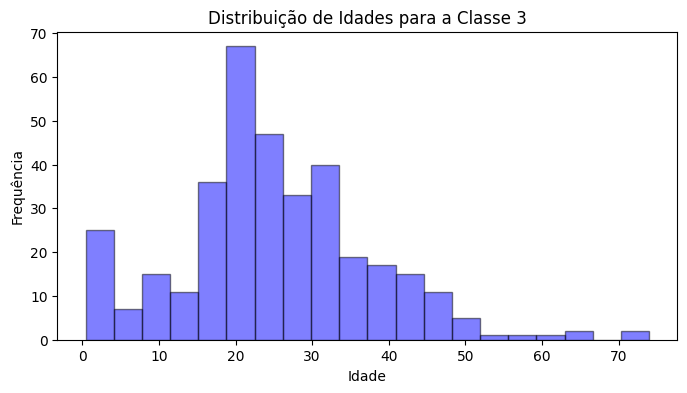

In [ ]:
# Seleciona as idades dos passageiros dessa classe
ages = titanic_data[titanic_data['Pclass'] == 3]['Age']

# Cria o histograma
plt.figure(figsize=(8, 4))
plt.hist(ages, bins=20, alpha=0.5, color='b', edgecolor='black')

plt.title('Distribui√ß√£o de Idades para a Classe 3')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')

plt.show()

**Explorando as correla√ß√µes entre as vari√°veis num√©ricas:**

<Axes: >

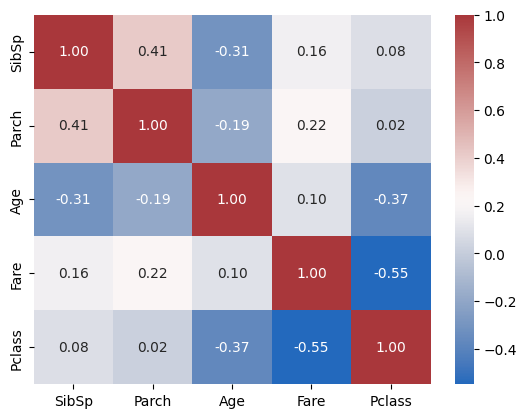

In [ ]:
sns.heatmap(titanic_data[['SibSp', 'Parch', 'Age', 'Fare', 'Pclass']].corr(), annot = True, fmt = '.2f', cmap = 'vlag')

Ao observar o heatmap acima, vemos que

1 - *Pclass* (classe social) e *Fare* (pre√ßo da passagem) possuem alta correla√ß√£o negativa entre si. O que nos diz que uma pessoa pertencente a uma classe social mais alta (menor n√∫mero) pagou mais pela passagem.

2 - *Parch* (quantidade de passageiros que s√£o das categorias pai, m√£e, filha, filho, enteada, enteado) e *SibSp* (quantidade de passageiros que s√£o das categorias irm√£o, irm√£, meio-irm√£o, meio-irm√£, marido, esposa) possuem alta correla√ß√£o positiva entre si. O que nos diz que uma pessoa que possui um maior n√∫mero de *Parch* tamb√©m implica em ter um maior n√∫mero de *SibSp*.


## Tratando os dados

Temos valores faltando?

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Temos valores faltando na coluna de Idade.

Assim, vamos preencher as c√©lulas vazias com a m√©dia da coluna Idade do dataset.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin # mixa automaticamente as fun√ß√µes fit e transform sem ter que definir explicitamente
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Preenche as idades faltantes com a m√©dia da coluna de idade
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])

        return X


Visando a an√°lise do dataset pelo modelo, vamos transformar as vari√°veis de categorias em vari√°veis num√©ricas da seguinte maneira:

> Embarked C = 0

> Embarked S = 1

> Embarked Q = 2

> Embarked N = 3

> Sex Female = 0

> Sex Male = 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()

        # Transform 'Embarked' column
        embarked_matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        X['Embarked'] = embarked_matrix.argmax(axis=1)

        # Transform 'Sex' column
        sex_matrix = encoder.fit_transform(X[['Sex']]).toarray()
        X['Sex'] = sex_matrix.argmax(axis=1)

        return X


Tamb√©m juntamos as colunas Pclass e Fare na coluna PclassFare. Al√©m disso, juntamos as colunas SibSp e Parch na coluna Family.

In [ ]:
class ColumnCombiner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Combine Pclass and Fare into a new column 'PclassFare'
        X['PclassFare'] = X['Fare'] / X['Pclass']

        # Combine SibSp and Parch into a new column 'Family'
        X['Family'] = X['SibSp'] + X['Parch']

        return X

Tamb√©m removemos as colunas que n√£o afetam na resolu√ß√£o do problema: nome, c√≥digo do ticket, cabine, classe do passageiro, id do passageiro, Unnamed: 0, Fare, SibSp, Parch.

In [ ]:
class FeatureDropper (BaseEstimator, TransformerMixin):

   def fit(self, X, y=None):
    return self

   def transform(self, X):
    return X.drop(["Name", "Ticket", "Cabin", "Pclass", "PassengerId", "Unnamed: 0", "Fare", "SibSp", "Parch"], axis = 1, errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),("featureencoder", FeatureEncoder()),("columncombiner", ColumnCombiner()),("featuredropper", FeatureDropper())])

In [ ]:
titanic_data = pipeline.fit_transform(titanic_data)

Por fim, normalizamos os dados utilizando o StandardScaler(), que funciona da seguinte maneira:

z \= (x \- ùúá)\/œÉ

onde z √© o novo valor da c√©lula, x √© o valor antigo da c√©lula, ùúá √© o valor da m√©dia da coluna respectiva e œÉ √© o valor do desvio padr√£o da coluna respectiva.

In [ ]:
scaler = StandardScaler()

titanic_data_normalized = scaler.fit_transform(titanic_data)

titanic_data = pd.DataFrame(titanic_data_normalized, columns=titanic_data.columns)

In [ ]:
titanic_data.info() # agora n√£o h√° mais c√©lulas vazias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         891 non-null    float64
 1   Age         891 non-null    float64
 2   Embarked    891 non-null    float64
 3   PclassFare  891 non-null    float64
 4   Family      891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


In [ ]:
titanic_data # visualizando as transforma√ß√µes no dataset

Sex       Age  Embarked  PclassFare    Family
0    0.737695 -0.592481  0.581114   -0.441847  0.059160
1   -1.355574  0.638789 -1.938460    0.902763  0.059160
2   -1.355574 -0.284663  0.581114   -0.437454 -0.560975
3   -1.355574  0.407926  0.581114    0.547737  0.059160
4    0.737695  0.407926  0.581114   -0.436640 -0.560975
..        ...       ...       ...         ...       ...
886  0.737695 -0.207709  0.581114   -0.362120 -0.560975
887 -1.355574 -0.823344  0.581114    0.096713 -0.560975
888 -1.355574  0.000000  0.581114   -0.336413  1.299429
889  0.737695 -0.284663 -1.938460    0.096713 -0.560975
890  0.737695  0.177063 -0.678673   -0.438592 -0.560975

[891 rows x 5 columns]

## Experimentos:

Descri√ß√£o dos par√¢metros do KMeans:

- n_clusters: N√∫mero de clusters a serem criados pelo algoritmo, tamb√©m conhecido como 'k'.

- init: M√©todo de inicializa√ß√£o dos valores dos centr√≥ides.

- n_init: Quantas vezes deve-se rodar o algoritmo com diferentes valores iniciais de centr√≥ides.

- max_iter: N√∫mero m√°ximo de itera√ß√µes do algoritmo por rodada.

- tol: A toler√¢ncia para considerar converg√™ncia do algoritmo referente √† diferen√ßa da norma entre os centr√≥ides de duas itera√ß√µes consecutivas.

- random_state: Par√¢metro que determina a aleatoriedade na gera√ß√£o dos valores iniciais dos centr√≥ides.

Encontrando o valor √≥timo de 'k' por meio do m√©todo do cotovelo (Elbow Method):

In [ ]:
def elbow_method(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  fig = plt.subplots(figsize = (10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('k')
  plt.ylabel('inertia')
  plt.grid(True)
  plt.show()

Utilizando as vari√°veis Age, PclassFare e Family, vemos abaixo que o valor √≥timo de k √© 4.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

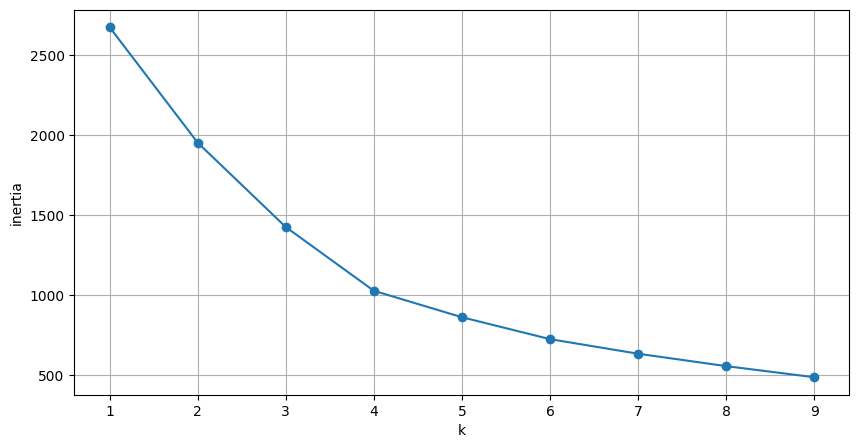

In [ ]:
elbow_method(titanic_data[['Age', 'PclassFare', 'Family']], 10)

Utilizando as vari√°veis Sex, PclassFare e Embarked, vemos abaixo que o valor √≥timo de k √© 4.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

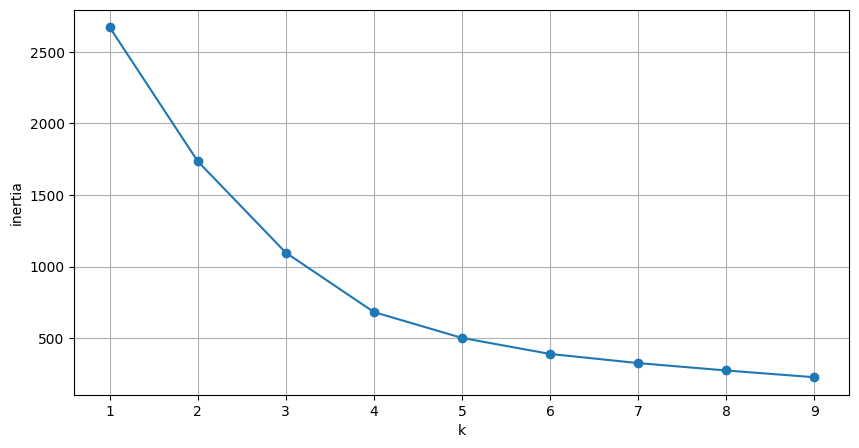

In [ ]:
elbow_method(titanic_data[['Sex', 'PclassFare', 'Embarked']], 10)

Utilizando as vari√°veis Sex e PclassFare, vemos abaixo que o valor √≥timo de k √© 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

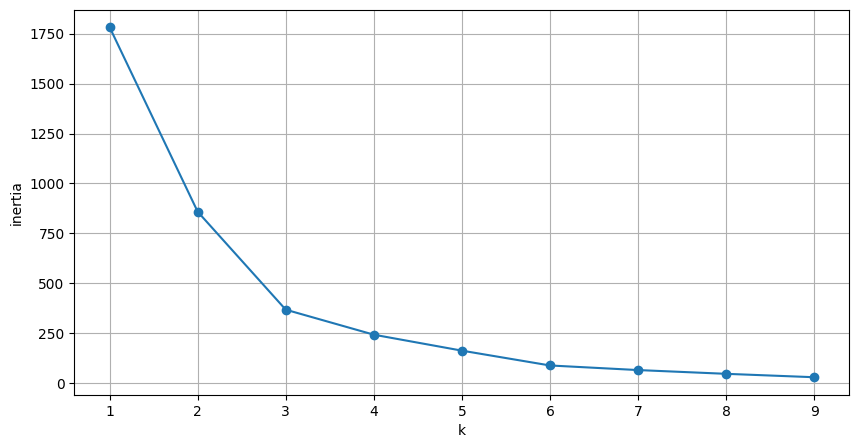

In [ ]:
elbow_method(titanic_data[['Sex', 'PclassFare']], 10)


Encontrando o valor √≥timo de 'k' por meio do m√©todo da silhueta (Silhouette):

In [ ]:
def silhouette_method(data, max_k):

  sil_score = []
  for k in range(2, max_k):
      clusterer = KMeans(n_clusters=k)
      preds = clusterer.fit_predict(data)
      score = silhouette_score(data, preds)
      sil_score.append(score)

  plt.plot(range(2, max_k), sil_score, color='#EE9D65')

Utilizando as vari√°veis Age, PclassFare e Family, vemos abaixo que o valor √≥timo de k √© 3.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

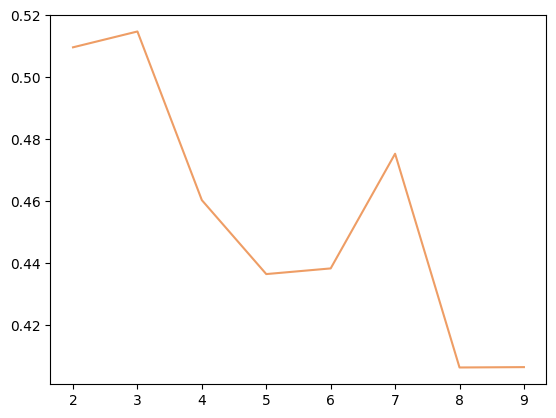

In [ ]:
silhouette_method(titanic_data[['Age', 'PclassFare', 'Family']], 10)

Utilizando as vari√°veis Sex, PclassFare e Embarked, vemos abaixo que o valor √≥timo de k √© 5.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

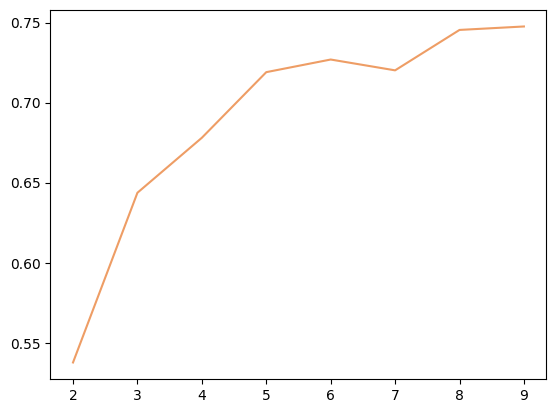

In [ ]:
silhouette_method(titanic_data[['Sex', 'PclassFare', 'Embarked']], 10)

Utilizando as vari√°veis Sex e PclassFare, vemos abaixo que o valor √≥timo de k √© 4.





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

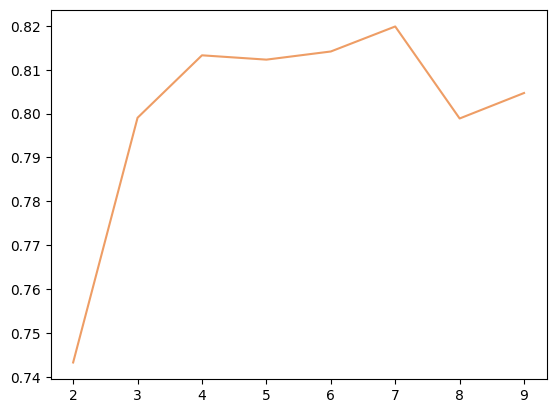

In [ ]:
silhouette_method(titanic_data[['Sex', 'PclassFare']], 10)

Resumo em rela√ß√£o aos m√©todos do cotovelo e da silhueta:

> Para as vari√°veis Age, PclassFare e Family: Elbow -> k = 4 | Silhouette -> k = 3

> Para as vari√°veis Sex, PclassFare e Embarked: Elbow -> k = 4 | Silhouette -> k = 5

> Para as vari√°veis Sex e PclassFare: Elbow -> k = 3 | Silhouette -> k = 4

A partir dos resultados dos experimentos acima, escolhemos k = 4. Assim, aplicando o K means clustering:

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'random', random_state = 42)

Considerando as vari√°veis Age, PclassFare e Family:

(Obs.: Neste gr√°fico, o tamanho dos pontos √© proporcional √† vari√°vel Family. Assim, √© poss√≠vel visualizar as tr√™s vari√°veis.)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


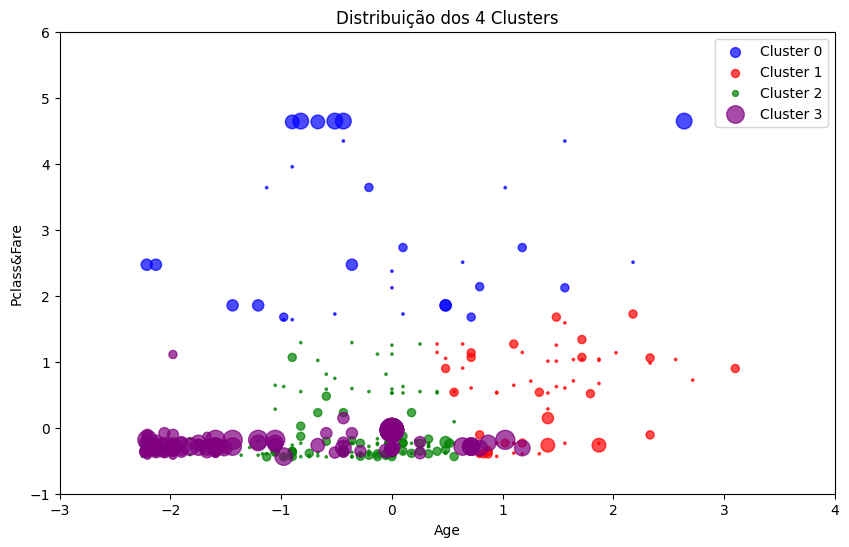

In [ ]:
kmeans.fit(titanic_data[['Age', 'PclassFare', 'Family']])
labels = kmeans.labels_

# Adicione os r√≥tulos dos clusters como uma nova coluna no DataFrame
titanic_data['Cluster'] = labels

# Crie um scatter plot para visualizar os clusters
plt.figure(figsize=(10, 6))

# Scatter plot para o cluster 0
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 0, 'Age'],
            titanic_data.loc[titanic_data['Cluster'] == 0, 'PclassFare'],
            s=titanic_data.loc[titanic_data['Cluster'] == 0, 'Family'] * 50,  # Tamanho dos pontos baseado na vari√°vel Family
            label='Cluster 0', color='blue', alpha=0.7)

# Scatter plot para o cluster 1
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 1, 'Age'],
            titanic_data.loc[titanic_data['Cluster'] == 1, 'PclassFare'],
            s=titanic_data.loc[titanic_data['Cluster'] == 1, 'Family'] * 50,
            label='Cluster 1', color='red', alpha=0.7)

# Scatter plot para o cluster 2
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 2, 'Age'],
            titanic_data.loc[titanic_data['Cluster'] == 2, 'PclassFare'],
            s=titanic_data.loc[titanic_data['Cluster'] == 2, 'Family'] * 50,
            label='Cluster 2', color='green', alpha=0.7)

# Scatter plot para o cluster 3
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 3, 'Age'],
            titanic_data.loc[titanic_data['Cluster'] == 3, 'PclassFare'],
            s=titanic_data.loc[titanic_data['Cluster'] == 3, 'Family'] * 50,
            label='Cluster 3', color='purple', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('PclassFare')
plt.xlim(-3, 4)
plt.ylim(-1, 6)
plt.title('Distribui√ß√£o dos 4 Clusters')
plt.legend()
plt.show()

In [ ]:
cluster_stats = titanic_data.groupby('Cluster').describe()

for column in titanic_data.columns:
  if(column != 'Cluster'):
    mean_values = cluster_stats[column]['mean']
    std_values = cluster_stats[column]['std']
    min_values = cluster_stats[column]['min']
    max_values = cluster_stats[column]['max']
    print('\t\t'+column)
    for cluster in range(4):
      print(f"Cluster {cluster} - M√©dia: {mean_values[cluster]:.2f}, Desvio Padr√£o: {std_values[cluster]:.2f}, M√≠nimo: {min_values[cluster]:.2f}, M√°ximo: {max_values[cluster]:.2f}")

		Sex
Cluster 0 - M√©dia: -0.66, Desvio Padr√£o: 1.00, M√≠nimo: -1.36, M√°ximo: 0.74
Cluster 1 - M√©dia: 0.08, Desvio Padr√£o: 0.98, M√≠nimo: -1.36, M√°ximo: 0.74
Cluster 2 - M√©dia: 0.09, Desvio Padr√£o: 0.97, M√≠nimo: -1.36, M√°ximo: 0.74
Cluster 3 - M√©dia: -0.36, Desvio Padr√£o: 1.05, M√≠nimo: -1.36, M√°ximo: 0.74
		Age
Cluster 0 - M√©dia: 0.02, Desvio Padr√£o: 0.99, M√≠nimo: -2.21, M√°ximo: 2.64
Cluster 1 - M√©dia: 1.53, Desvio Padr√£o: 0.68, M√≠nimo: 0.41, M√°ximo: 3.87
Cluster 2 - M√©dia: -0.23, Desvio Padr√£o: 0.48, M√≠nimo: -2.25, M√°ximo: 0.72
Cluster 3 - M√©dia: -1.17, Desvio Padr√£o: 1.01, M√≠nimo: -2.23, M√°ximo: 1.18
		Embarked
Cluster 0 - M√©dia: -0.68, Desvio Padr√£o: 1.27, M√≠nimo: -1.94, M√°ximo: 0.58
Cluster 1 - M√©dia: 0.04, Desvio Padr√£o: 1.04, M√≠nimo: -1.94, M√°ximo: 1.84
Cluster 2 - M√©dia: 0.00, Desvio Padr√£o: 0.97, M√≠nimo: -1.94, M√°ximo: 0.58
Cluster 3 - M√©dia: 0.26, Desvio Padr√£o: 0.80, M√≠nimo: -1.94, M√°ximo: 0.58
		Pclass&Fare
Cluster 0 - M√©dia: 3.3

Considerando as vari√°veis Sex, PclassFare:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


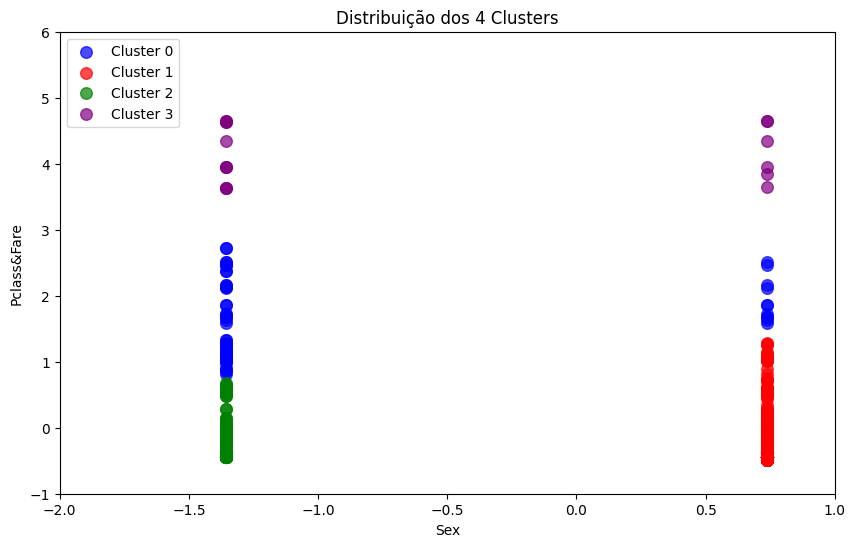

In [ ]:
kmeans.fit(titanic_data[['Sex', 'PclassFare']])
labels = kmeans.labels_

# Adicione os r√≥tulos dos clusters como uma nova coluna no DataFrame
titanic_data['Cluster'] = labels

# Crie um scatter plot para visualizar os clusters
plt.figure(figsize=(10, 6))

# Scatter plot para o cluster 0
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 0, 'Sex'],
            titanic_data.loc[titanic_data['Cluster'] == 0, 'PclassFare'],
            label='Cluster 0', color='blue', alpha=0.7, s=70)

# Scatter plot para o cluster 1
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 1, 'Sex'],
            titanic_data.loc[titanic_data['Cluster'] == 1, 'PclassFare'],
            label='Cluster 1', color='red', alpha=0.7, s=70)

# Scatter plot para o cluster 2
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 2, 'Sex'],
            titanic_data.loc[titanic_data['Cluster'] == 2, 'PclassFare'],
            label='Cluster 2', color='green', alpha=0.7, s=70)

# Scatter plot para o cluster 3
plt.scatter(titanic_data.loc[titanic_data['Cluster'] == 3, 'Sex'],
            titanic_data.loc[titanic_data['Cluster'] == 3, 'PclassFare'],
            label='Cluster 3', color='purple', alpha=0.7, s=70)

plt.xlabel('Sex')
plt.ylabel('PclassFare')
plt.xlim(-2, 1)
plt.ylim(-1, 6)
plt.title('Distribui√ß√£o dos 4 Clusters')
plt.legend()
plt.show()

In [ ]:
cluster_stats = titanic_data.groupby('Cluster').describe()

for column in titanic_data.columns:
  if(column != 'Cluster'):
    mean_values = cluster_stats[column]['mean']
    std_values = cluster_stats[column]['std']
    min_values = cluster_stats[column]['min']
    max_values = cluster_stats[column]['max']
    print('\t\t'+column)
    for cluster in range(4):
      print(f"Cluster {cluster} - M√©dia: {mean_values[cluster]:.2f}, Desvio Padr√£o: {std_values[cluster]:.2f}, M√≠nimo: {min_values[cluster]:.2f}, M√°ximo: {max_values[cluster]:.2f}")

		Sex
Cluster 0 - M√©dia: -1.01, Desvio Padr√£o: 0.79, M√≠nimo: -1.36, M√°ximo: 0.74
Cluster 1 - M√©dia: 0.74, Desvio Padr√£o: 0.00, M√≠nimo: 0.74, M√°ximo: 0.74
Cluster 2 - M√©dia: -1.36, Desvio Padr√£o: 0.00, M√≠nimo: -1.36, M√°ximo: -1.36
Cluster 3 - M√©dia: -0.52, Desvio Padr√£o: 1.05, M√≠nimo: -1.36, M√°ximo: 0.74
		Age
Cluster 0 - M√©dia: 0.35, Desvio Padr√£o: 1.10, M√≠nimo: -2.21, M√°ximo: 2.56
Cluster 1 - M√©dia: 0.06, Desvio Padr√£o: 0.99, M√≠nimo: -2.25, M√°ximo: 3.87
Cluster 2 - M√©dia: -0.23, Desvio Padr√£o: 0.96, M√≠nimo: -2.23, M√°ximo: 2.56
Cluster 3 - M√©dia: 0.10, Desvio Padr√£o: 0.94, M√≠nimo: -1.13, M√°ximo: 2.64
		Embarked
Cluster 0 - M√©dia: -0.62, Desvio Padr√£o: 1.32, M√≠nimo: -1.94, M√°ximo: 1.84
Cluster 1 - M√©dia: 0.11, Desvio Padr√£o: 0.92, M√≠nimo: -1.94, M√°ximo: 0.58
Cluster 2 - M√©dia: -0.01, Desvio Padr√£o: 0.96, M√≠nimo: -1.94, M√°ximo: 0.58
Cluster 3 - M√©dia: -0.93, Desvio Padr√£o: 1.27, M√≠nimo: -1.94, M√°ximo: 0.58
		Pclass&Fare
Cluster 0 - M√©dia: 

Terminado os experimentos com K-Means, podemos olhar para solu√ß√µes mais eficazes para lidar com problemas de clustering em dados aninhados e de alta dimens√£o, o algoritmo de clustering DBSCAN √© uma op√ß√£o! Ele introduz tr√™s conceitos cruciais e dois hiperpar√¢metros fundamentais:

Conceitos:

Ponto Central: Este √© o ponto focal que abriga pelo menos um n√∫mero m√≠nimo de pontos de dados (minPts) em sua vizinhan√ßa, permitindo que o cluster se estenda al√©m dessa regi√£o.

Ponto N√£o-Central: Ao contr√°rio do ponto central, este n√£o possui o n√∫mero m√≠nimo de pontos (minPts) em sua vizinhan√ßa, logo n√£o pode expandir o cluster.

Outliers / Ru√≠do: Estes s√£o os pontos de dados que n√£o se enquadram em nenhum cluster estabelecido.

Hiperpar√¢metros:

minPts: Representa o n√∫mero m√≠nimo de pontos de dados que devem estar presentes na vizinhan√ßa de um ponto para que seja considerado um ponto central.

√âpsilon: Determina o raio da vizinhan√ßa de um ponto central, definindo a √°rea em que outros pontos ser√£o considerados membros do mesmo cluster.








O dataset atual normalizado, mesmo ap√≥s a redu√ß√£o do n√∫mero de features, ainda conta com 5 dimens√µes. Seria interessante, nesse momento, reduzir o n√∫mero de dimens√µes de modo que seja poss√≠vel tratar o problema de forma mais simples.

In [ ]:
pca = PCA(n_components = 2)
pca.fit(titanic_data)
data_pca = pca.transform(titanic_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

PC1       PC2
0 -0.660939 -0.842198
1  1.745844  1.670547
2  0.157099 -0.451524
3  0.784356  0.141163
4 -1.217120  0.031816

Para esse trabalho escolhemos o m√©todo PCA, que reduziu o original a duas dimens√µes PC1 e PC2

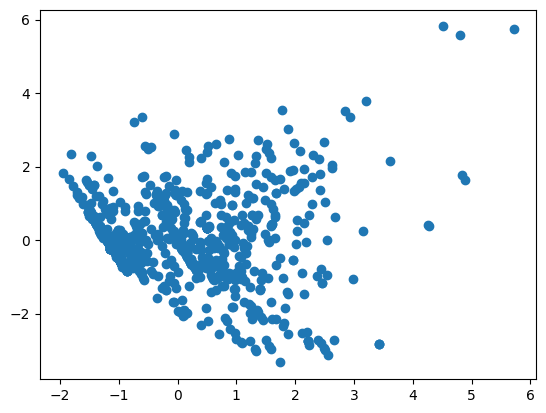

In [ ]:
plt.scatter(data_pca.PC1, data_pca.PC2)

Acima √© poss√≠vel ver a distribui√ß√£o dos pontos no eixo cartesiano.

Podemos, inicialmente modelar o DBSCAN com essas duas dimens√µes e escolher "eps" e "min_samples" arbitrariamente como 0.2 e 15 apenas para uma primeira an√°lise dos resultados.

In [ ]:
X = data_pca.to_numpy()

dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [ ]:
data_pca['cluster'] = dbscan_cluster_model.labels_

data_pca

PC1       PC2  cluster
0   -0.660939 -0.842198        1
1    1.745844  1.670547       -1
2    0.157099 -0.451524        0
3    0.784356  0.141163        4
4   -1.217120  0.031816        1
..        ...       ...      ...
886 -1.029655 -0.302671        1
887  0.551273 -0.529651        0
888  1.077510 -1.052938       -1
889  0.058224  1.089915       -1
890 -0.739570  0.507077        1

[891 rows x 3 columns]

Temos, ent√£o, a distribui√ß√£o dos clusters da seguinte forma:

In [ ]:
data_pca['cluster'].value_counts()

-1    385
 1    354
 0     74
 2     38
 3     24
 4     16
Name: cluster, dtype: int64

A primeira vista, √© poss√≠vel notar que muitos pontos n√£o foram relacionados a nenhum cluster (-1). Podemos analisar a representa√ß√£o visual:

In [ ]:
fig = px.scatter(x=data_pca.PC1, y=data_pca.PC2, color=data_pca['cluster'])

fig.show()

Usando o m√©todo de score silhouette, √© poss√≠vel determinar uma pontua√ß√£o para esses clusters:

In [ ]:
silhouette_score(X, data_pca['cluster'])

0.10105272148214801

Considerando que o score m√°ximo √© 1 e o m√≠nimo -1, √© poss√≠vel notar que essa disposi√ß√£o de clusters teve uma pontua√ß√£o mediana.

Iremos agora, ent√£o, definir uma forma para escolher os melhores hiperpar√¢metros eps e min_samples de modo a obter o melhor score poss√≠vel.

In [ ]:
epss = np.linspace(0.01, 1, num=15)
epss


array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [ ]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
combinations = list(itertools.product(epss, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

Dessa forma definimos todas as combina√ß√µes poss√≠vel para o intervalo de epss e min_samples que definimos.

Considerando isso, temos a fun√ß√£o get_scores_and_labels, que compara os scores de cada uma dessas combina√ß√µes e retorna o melhor score com seus respectivos esp, min_samples e labels.

In [ ]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    # Se o modelo possuir menos de 2 clusters ou mais de 50 ele √© descartado
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('ruim')
      c = (eps, num_samples)
      continue

    scores.append(silhouette_score(X, labels))
    all_labels_list.append(labels)

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

In [ ]:
best_dict

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Com isso o melhor score alcan√ßado foi 0,54 com eps = 1 e min_samples = 2.

A disposi√ß√£o dos clusters ficou definida dessa forma:

In [ ]:
data_pca['cluster'] = best_dict['best_labels']

data_pca['cluster'].value_counts()

0    884
2      3
1      2
3      2
Name: cluster, dtype: int64

Visualmente, temos:

In [ ]:
fig = px.scatter(x=data_pca.PC1, y=data_pca.PC2, color=data_pca['cluster'])
fig.show()

In [ ]:
data_pca

PC1       PC2  cluster
0   -0.660939 -0.842198        0
1    1.745844  1.670547        0
2    0.157099 -0.451524        0
3    0.784356  0.141163        0
4   -1.217120  0.031816        0
..        ...       ...      ...
886 -1.029655 -0.302671        0
887  0.551273 -0.529651        0
888  1.077510 -1.052938        0
889  0.058224  1.089915        0
890 -0.739570  0.507077        0

[891 rows x 3 columns]

In [ ]:
cluster_stats = data_pca.groupby('cluster').describe()
cluster_stats

PC1                                                              \
         count      mean       std       min       25%       50%       75%   
cluster                                                                      
0        884.0 -0.037665  1.117495 -1.953609 -0.991931 -0.270592  0.755109   
1          2.0  4.266614  0.013337  4.257183  4.261899  4.266614  4.271330   
2          3.0  5.009888  0.628088  4.510044  4.657379  4.804714  5.259810   
3          2.0  4.866385  0.040012  4.838093  4.852239  4.866385  4.880532   

                     PC2                                                    \
              max  count      mean       std       min       25%       50%   
cluster                                                                      
0        3.620155  884.0 -0.024151  1.094667 -3.327796 -0.609926 -0.115342   
1        4.276045    2.0  0.395523  0.032578  0.372487  0.384005  0.395523   
2        5.714905    3.0  5.714706  0.116248  5.586400  5.665551  5.744701   
3        4.894678    2.0  1.707082  0.097735  1.637973  1.672528  1.707082   

                             
              75%       max  
cluster                      
0        0.539675  3.797674  
1        0.407042  0.418560  
2        5.778859  5.813017  
3        1.741637  1.776191

Iremos agora repetir o experimento, por√©m sem diminuir o n√∫mero de dimens√µes por meio do PCA. Ser√£o consideradas as 5 features selecionadas ap√≥s o processo de feature engineering.

In [ ]:
X = titanic_data.to_numpy()

dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [ ]:
titanic_data['cluster'] = dbscan_cluster_model.labels_

titanic_data

Sex       Age  Embarked  PclassFare    Family  cluster
0    0.737695 -0.592481  0.581114   -0.441847  0.059160       -1
1   -1.355574  0.638789 -1.938460    0.902763  0.059160       -1
2   -1.355574 -0.284663  0.581114   -0.437454 -0.560975        4
3   -1.355574  0.407926  0.581114    0.547737  0.059160       -1
4    0.737695  0.407926  0.581114   -0.436640 -0.560975        0
..        ...       ...       ...         ...       ...      ...
886  0.737695 -0.207709  0.581114   -0.362120 -0.560975        0
887 -1.355574 -0.823344  0.581114    0.096713 -0.560975       -1
888 -1.355574  0.000000  0.581114   -0.336413  1.299429       -1
889  0.737695 -0.284663 -1.938460    0.096713 -0.560975       -1
890  0.737695  0.177063 -0.678673   -0.438592 -0.560975        1

[891 rows x 6 columns]

In [ ]:
titanic_data['cluster'].value_counts()

-1    554
 0    237
 1     23
 2     21
 4     20
 3     20
 5     16
Name: cluster, dtype: int64

Essa √© a disposi√ß√£o dos clusters, assim como na primeira vez, muitos outliers nessa configura√ß√£o de hiperpar√¢metros.

In [ ]:
silhouette_score(X, titanic_data['cluster'])

-0.13782500203567122

A pontua√ß√£o foi abaixo da m√©dia.

Realizando o mesmo processo de hypertuning de antes considerando os mesmos intervalos para os par√¢metros, temos:

In [ ]:
best_dict = get_scores_and_labels(combinations, X)

In [ ]:
best_dict

{'best_epsilon': 0.7878571428571429,
 'best_min_samples': 8,
 'best_labels': array([ 0,  7,  1,  1,  0,  2,  0,  0,  1,  3,  1,  1,  0, -1,  1,  1, -1,
         0,  1,  3,  0,  0,  5,  0,  1, -1,  4, -1,  5,  0,  4, -1,  5,  0,
        -1,  0,  4,  0,  1,  3,  1,  1,  4, -1,  5,  0,  2,  5,  4,  1,  6,
         0,  8,  1, -1,  0,  1,  4,  1,  6,  4, -1,  0,  6,  4,  4,  1,  0,
         9,  0,  0,  9,  0,  4,  0,  0,  0,  0,  0,  1,  0,  0,  5,  0,  1,
         1,  6,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  5,  0,  3,  0,  1,  3,  0, -1,  0, -1,
         9,  0,  0,  4,  1,  0, -1,  2,  0,  3,  0,  4,  0,  1,  1,  0,  4,
         1,  0,  0, -1,  3,  1,  1,  2,  0,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  0, -1,  5,  0,  0, -1,  0,  1,  0,  0,  6,  0,  1, -1,  0,  0,
         0, -1,  1,  0, -1,  0,  0, -1,  0,  0, -1,  4,  6,  0,  1,  0,  5,
         0, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  5,  1,  0, -1,  0,  4,
         0, 

O melhor score foi 0,21 com eps de 0.7878571428571429 e min_samples de 8

In [ ]:
titanic_data['cluster'] = best_dict['best_labels']

titanic_data['cluster'].value_counts()

 0    408
 1    163
-1    117
 4     63
 5     34
 2     32
 3     26
 7     16
 6     15
 9      9
 8      8
Name: cluster, dtype: int64

In [ ]:
cluster_stats = titanic_data.groupby('cluster').describe()
cluster_stats

Sex                                                        \
         count      mean           std       min       25%       50%   
cluster                                                                
-1       117.0 -0.299994  1.051098e+00 -1.355574 -1.355574  0.737695   
 0       408.0  0.737695  1.111586e-16  0.737695  0.737695  0.737695   
 1       163.0 -1.355574  2.227289e-16 -1.355574 -1.355574 -1.355574   
 2        32.0  0.737695  0.000000e+00  0.737695  0.737695  0.737695   
 3        26.0 -1.355574  2.264420e-16 -1.355574 -1.355574 -1.355574   
 4        63.0  0.737695  2.238281e-16  0.737695  0.737695  0.737695   
 5        34.0 -1.355574  2.253838e-16 -1.355574 -1.355574 -1.355574   
 6        15.0  0.737695  0.000000e+00  0.737695  0.737695  0.737695   
 7        16.0 -1.355574  0.000000e+00 -1.355574 -1.355574 -1.355574   
 8         8.0 -1.355574  0.000000e+00 -1.355574 -1.355574 -1.355574   
 9         9.0 -1.355574  0.000000e+00 -1.355574 -1.355574 -1.355574   

                               Age            ... PclassFare           Family  \
              75%       max  count      mean  ...        75%       max  count   
cluster                                       ...                               
-1       0.737695  0.737695  117.0  0.415181  ...   2.371762  9.514110  117.0   
 0       0.737695  0.737695  408.0  0.080091  ...  -0.305986  1.268203  408.0   
 1      -1.355574 -1.355574  163.0 -0.165885  ...  -0.232768  1.336540  163.0   
 2       0.737695  0.737695   32.0 -0.024995  ...  -0.438464 -0.331857   32.0   
 3      -1.355574 -1.355574   26.0 -0.730425  ...  -0.356717  0.116238   26.0   
 4       0.737695  0.737695   63.0 -0.015961  ...  -0.105450  1.009093   63.0   
 5      -1.355574 -1.355574   34.0 -0.175391  ...  -0.436247 -0.331857   34.0   
 6       0.737695  0.737695   15.0 -1.664711  ...  -0.207264 -0.183793   15.0   
 7      -1.355574 -1.355574   16.0 -0.102876  ...   1.610661  2.159186   16.0   
 8      -1.355574 -1.355574    8.0  1.725769  ...   1.039113  1.134620    8.0   
 9      -1.355574 -1.355574    9.0 -1.627089  ...  -0.285485 -0.183793    9.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
-1       0.901907  1.613135 -0.560975  0.059160  0.679295  1.299429  5.640372  
 0      -0.348184  0.453814 -0.560975 -0.560975 -0.560975 -0.560975  1.919564  
 1       0.101009  0.726368 -0.560975 -0.560975  0.059160  0.679295  2.539699  
 2      -0.444700  0.292039 -0.560975 -0.560975 -0.560975 -0.560975  0.679295  
 3       0.106863  0.579700 -0.560975 -0.560975  0.059160  0.679295  1.299429  
 4      -0.364107  0.428853 -0.560975 -0.560975 -0.560975 -0.560975  1.299429  
 5      -0.378582  0.390105 -0.560975 -0.560975 -0.560975 -0.560975  0.679295  
 6       2.953122  0.605190  1.919564  2.539699  2.539699  3.469901  3.779968  
 7      -0.328424  0.310067 -0.560975 -0.560975 -0.560975  0.059160  0.059160  
 8       0.059160  0.000000  0.059160  0.059160  0.059160  0.059160  0.059160  
 9       3.090930  0.372655  2.539699  3.159833  3.159833  3.159833  3.779968  

[11 rows x 40 columns]